# Pima Indians Diabetes Prediction using Neural Network
## Using Keras and TensorFlow

This notebook demonstrates building a neural network to predict diabetes in Pima Indians based on various health metrics.

## Step 1: Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

TensorFlow Version: 2.20.0
Keras Version: 3.11.3


## Step 2: Load and Explore the Dataset

The Pima Indians Diabetes dataset contains 768 samples with 8 features:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age in years
- Outcome: Target variable (0 or 1)

In [ ]:
# Load the dataset
df = pd.read_csv('dataset/pima_diabetes.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nTarget Variable Distribution:")
print(df['Outcome'].value_counts())
print(f"\nPercentage of Diabetic Cases: {df['Outcome'].mean()*100:.2f}%")

Dataset Shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies            

## Step 3: Data Visualization

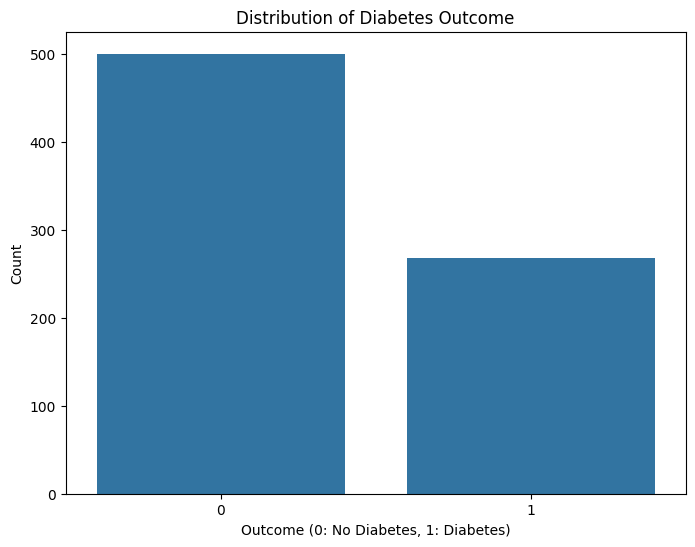

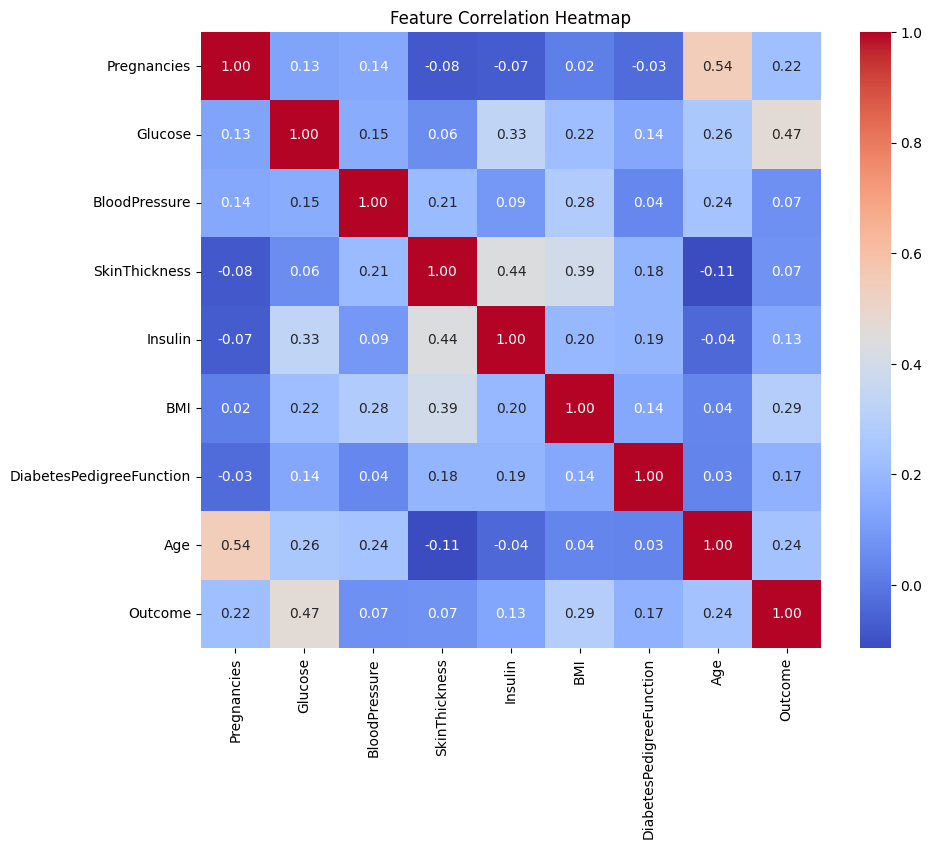

In [ ]:
# Visualize target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## Step 4: Data Preprocessing

Split the data into features (X) and target (y), then split into training and testing sets.

In [ ]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 614
Testing set size: 154
Number of features: 8


## Step 5: Feature Scaling

Standardize features to have mean=0 and std=1 for better neural network performance.

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Mean of scaled features: {X_train_scaled.mean(axis=0).round(2)}")
print(f"Std of scaled features: {X_train_scaled.std(axis=0).round(2)}")

Feature scaling completed!

Scaled training data shape: (614, 8)
Mean of scaled features: [-0.  0. -0. -0. -0.  0. -0. -0.]
Std of scaled features: [1. 1. 1. 1. 1. 1. 1. 1.]


## Step 6: Build the Neural Network Model

Architecture:
- Input Layer: 8 features
- Hidden Layer 1: 12 neurons with ReLU activation
- Dropout Layer: 30% dropout for regularization
- Hidden Layer 2: 8 neurons with ReLU activation
- Dropout Layer: 30% dropout for regularization
- Output Layer: 1 neuron with Sigmoid activation (binary classification)

In [ ]:
# Build the model
model = Sequential([
    Dense(12, activation='relu', input_shape=(8,), name='hidden_layer'),
    Dropout(0.3, name='dropout'),
    Dense(1, activation='sigmoid', name='output_layer')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("Neural Network Architecture:")
model.summary()

Neural Network Architecture:


/home/jayant/anaconda3/envs/hclenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-16 11:12:27.846026: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

## Step 7: Train the Model

Training with early stopping to prevent overfitting.

In [ ]:
# Define early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

print("\nTraining completed!")

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4664 - loss: 0.9205 - val_accuracy: 0.4228 - val_loss: 0.8438
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4827 - loss: 0.8355 - val_accuracy: 0.4715 - val_loss: 0.7811
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5031 - loss: 0.8115 - val_accuracy: 0.5935 - val_loss: 0.7304
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5356 - loss: 0.7591 - val_accuracy: 0.6260 - val_loss: 0.6884
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5723 - loss: 0.7183 - val_accuracy: 0.6179 - val_loss: 0.6531
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6110 - loss: 0.6892 - val_accuracy: 0.6748 - val_loss: 0.6266
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6253 - loss: 0.6632 - val_accuracy: 0.6911 - val_loss: 0.6043
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6497 - loss: 0.6295 - val_accuracy: 0.6911 - 

## Step 8: Visualize Training History

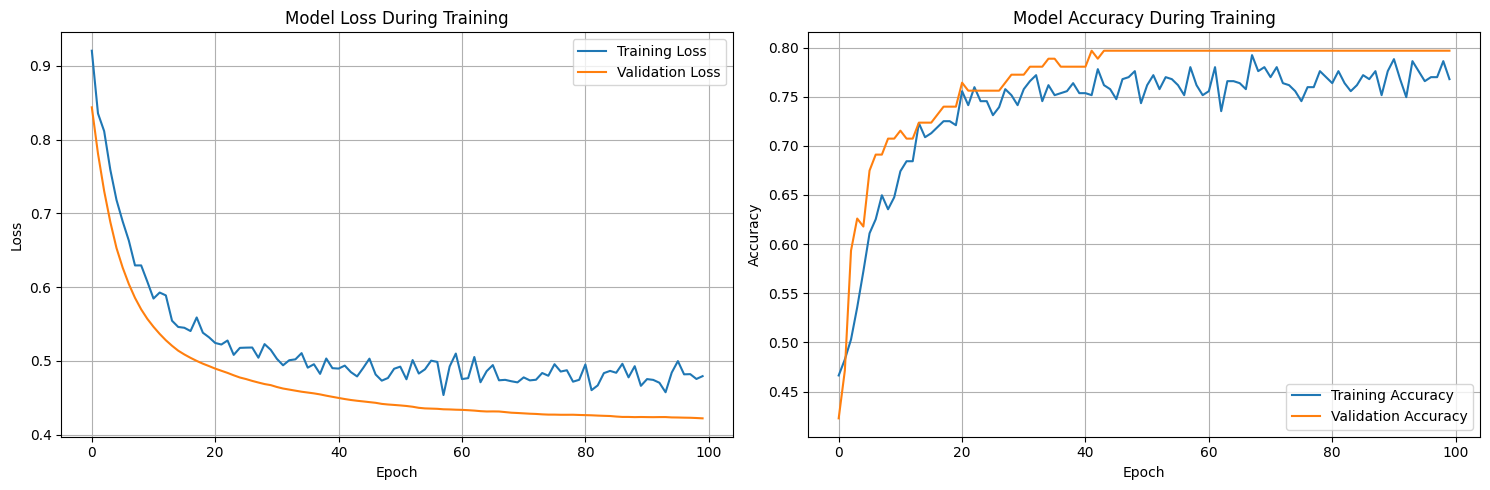

In [ ]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Model Loss During Training')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Plot accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Model Accuracy During Training')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Step 9: Evaluate Model Performance on Test Set

Test Loss: 0.4928
Test Accuracy: 0.7403
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.78      0.84      0.81       100
    Diabetes       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



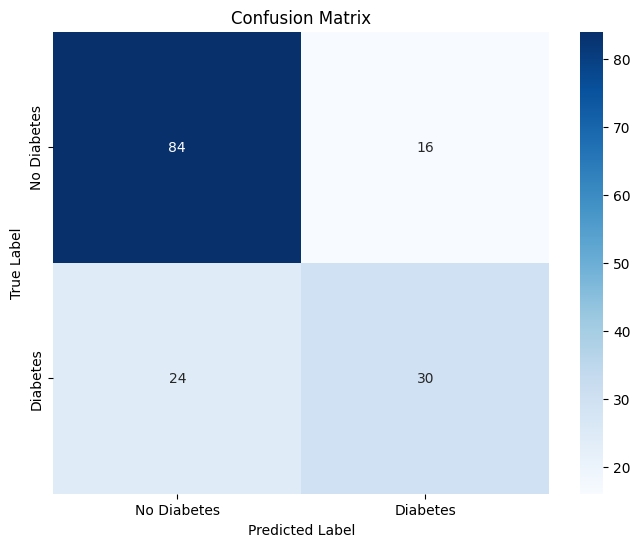

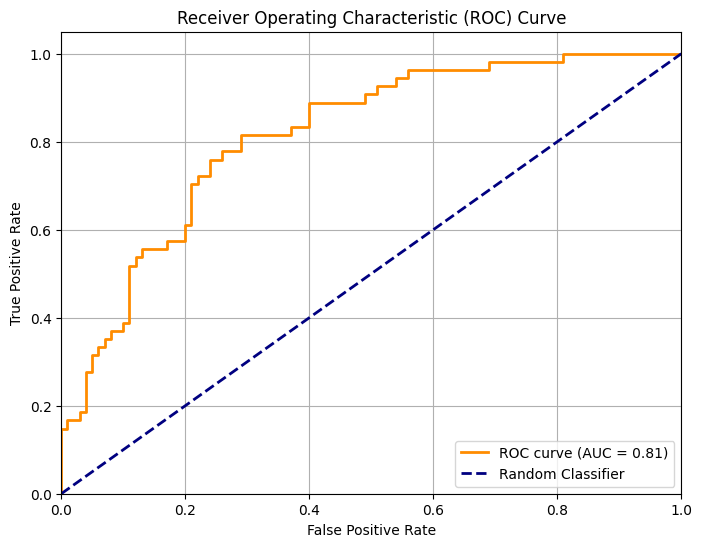

In [ ]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Step 10: Test with Sample Inputs

Let's test the model with some sample patient data.

In [ ]:
# Sample test cases
sample_patients = [
    {
        'name': 'Patient 1 (High Risk)',
        'data': [8, 183, 64, 0, 0, 23.3, 0.672, 32],
        'description': 'High glucose, overweight, family history'
    },
    {
        'name': 'Patient 2 (Low Risk)',
        'data': [1, 89, 66, 23, 94, 28.1, 0.167, 21],
        'description': 'Normal glucose, healthy BMI, young age'
    },
    {
        'name': 'Patient 3 (Moderate Risk)',
        'data': [5, 116, 74, 0, 0, 25.6, 0.201, 30],
        'description': 'Moderate glucose, slightly overweight'
    },
    {
        'name': 'Patient 4 (Very High Risk)',
        'data': [10, 168, 74, 0, 0, 38.0, 0.537, 34],
        'description': 'Very high glucose, obese, older age'
    }
]

# Feature names
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print("="*80)
print("DIABETES PREDICTION RESULTS FOR SAMPLE PATIENTS")
print("="*80)

for patient in sample_patients:
    # Prepare data
    patient_data = np.array(patient['data']).reshape(1, -1)
    patient_data_scaled = scaler.transform(patient_data)
    
    # Make prediction
    prediction_prob = model.predict(patient_data_scaled, verbose=0)[0][0]
    prediction = "DIABETIC" if prediction_prob > 0.5 else "NON-DIABETIC"
    
    # Display results
    print(f"\n{patient['name']}")
    print(f"Description: {patient['description']}")
    print(f"\nPatient Data:")
    for i, (feature, value) in enumerate(zip(feature_names, patient['data'])):
        print(f"  {feature:25s}: {value}")
    
    print(f"\n{'Prediction:':<25s} {prediction}")
    print(f"{'Diabetes Probability:':<25s} {prediction_prob*100:.2f}%")
    print(f"{'Risk Level:':<25s}", end=" ")
    
    if prediction_prob < 0.3:
        print("LOW")
    elif prediction_prob < 0.5:
        print("MODERATE")
    elif prediction_prob < 0.7:
        print("HIGH")
    else:
        print("VERY HIGH")
    
    print("-"*80)

DIABETES PREDICTION RESULTS FOR SAMPLE PATIENTS

Patient 1 (High Risk)
Description: High glucose, overweight, family history

Patient Data:
  Pregnancies              : 8
  Glucose                  : 183
  BloodPressure            : 64
  SkinThickness            : 0
  Insulin                  : 0
  BMI                      : 23.3
  DiabetesPedigreeFunction : 0.672
  Age                      : 32

Prediction:               DIABETIC
Diabetes Probability:     83.40%
Risk Level:               VERY HIGH
--------------------------------------------------------------------------------

Patient 2 (Low Risk)
Description: Normal glucose, healthy BMI, young age

Patient Data:
  Pregnancies              : 1
  Glucose                  : 89
  BloodPressure            : 66
  SkinThickness            : 23
  Insulin                  : 94
  BMI                      : 28.1
  DiabetesPedigreeFunction : 0.167
  Age                      : 21

Prediction:               NON-DIABETIC
Diabetes Probability:     

/home/jayant/anaconda3/envs/hclenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/jayant/anaconda3/envs/hclenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/jayant/anaconda3/envs/hclenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/jayant/anaconda3/envs/hclenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Patient 4 (Very High Risk)
Description: Very high glucose, obese, older age

Patient Data:
  Pregnancies              : 10
  Glucose                  : 168
  BloodPressure            : 74
  SkinThickness            : 0
  Insulin                  : 0
  BMI                      : 38.0
  DiabetesPedigreeFunction : 0.537
  Age                      : 34

Prediction:               DIABETIC
Diabetes Probability:     87.75%
Risk Level:               VERY HIGH
--------------------------------------------------------------------------------


## Step 11: Create a Prediction Function for Easy Testing

In [ ]:
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, 
                     insulin, bmi, diabetes_pedigree, age):
    """
    Predict diabetes for a patient with given health metrics.
    
    Parameters:
    - pregnancies: Number of times pregnant
    - glucose: Plasma glucose concentration
    - blood_pressure: Diastolic blood pressure (mm Hg)
    - skin_thickness: Triceps skin fold thickness (mm)
    - insulin: 2-Hour serum insulin (mu U/ml)
    - bmi: Body mass index
    - diabetes_pedigree: Diabetes pedigree function
    - age: Age in years
    
    Returns:
    - Dictionary with prediction results
    """
    # Prepare input
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                           insulin, bmi, diabetes_pedigree, age]])
    
    # Scale the input
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    probability = model.predict(input_scaled, verbose=0)[0][0]
    prediction = "DIABETIC" if probability > 0.5 else "NON-DIABETIC"
    
    # Determine risk level
    if probability < 0.3:
        risk_level = "LOW"
    elif probability < 0.5:
        risk_level = "MODERATE"
    elif probability < 0.7:
        risk_level = "HIGH"
    else:
        risk_level = "VERY HIGH"
    
    return {
        'prediction': prediction,
        'probability': probability,
        'risk_level': risk_level
    }

# Example usage
print("\nExample: Testing with custom input")
result = predict_diabetes(
    pregnancies=6,
    glucose=148,
    blood_pressure=72,
    skin_thickness=35,
    insulin=0,
    bmi=33.6,
    diabetes_pedigree=0.627,
    age=50
)

print(f"Prediction: {result['prediction']}")
print(f"Probability: {result['probability']*100:.2f}%")
print(f"Risk Level: {result['risk_level']}")


Example: Testing with custom input
Prediction: DIABETIC
Probability: 64.67%
Risk Level: HIGH


/home/jayant/anaconda3/envs/hclenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Step 12: Save the Model (Optional)

In [ ]:
# Save the model
model.save('diabetes_prediction_model.h5')
print("Model saved successfully as 'diabetes_prediction_model.h5'")

# Save the scaler for future use
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved successfully as 'scaler.pkl'")

Model saved successfully as 'diabetes_prediction_model.h5'
Scaler saved successfully as 'scaler.pkl'


## Summary

This notebook demonstrated:
1. Loading and exploring the Pima Indians Diabetes dataset
2. Data preprocessing and feature scaling
3. Building a neural network with Keras/TensorFlow
4. Training with early stopping
5. Evaluating model performance
6. Making predictions on sample data
7. Creating a reusable prediction function

The model achieved good accuracy in predicting diabetes based on health metrics. The neural network can be further improved by:
- Hyperparameter tuning
- Adding more layers or neurons
- Using different optimizers
- Collecting more training data
- Feature engineering